In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\Social_Network_Ads (1).csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [20]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
df.shape

(400, 5)

In [23]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

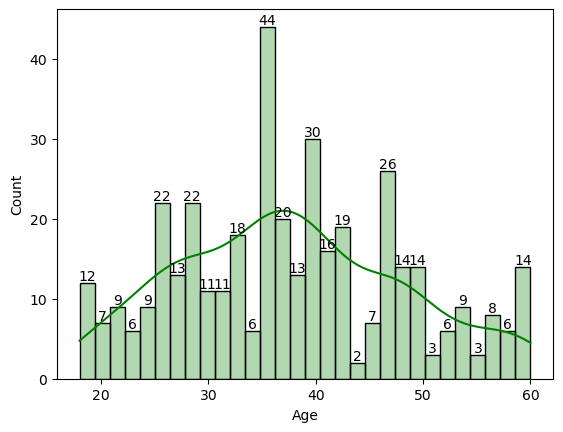

In [63]:
hisplot = sns.histplot(df['Age'], kde=True, bins=30, color='green', alpha=0.3)
for i in hisplot.containers:
   hisplot.bar_label(i)  
   plt.show()

In [26]:
skewness = df['Age'].skew()
print(skewness)
mean=np.mean(df['Age'])
print(mean)
md=np.median(df['Age'])
print(md)
sd=np.std(df['Age'])
print(sd)
skew=(3*(mean-md))/sd
print(skew)

0.23133746309642822
37.655
37.0
10.469764801560734
0.18768329921862997


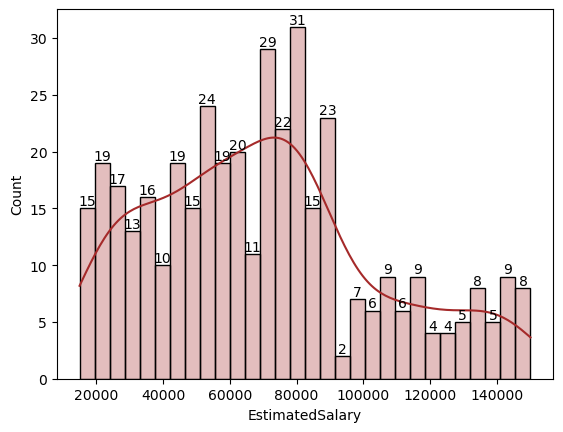

In [64]:
hisplot=sns.histplot(df['EstimatedSalary'],kde=True,bins=30,color='brown',alpha=0.3)
for i in hisplot.containers:
    hisplot.bar_label(i)
plt.show()

In [28]:
skewness = df['EstimatedSalary'].skew()
print(skewness)

0.49502362888993623


In [29]:
count=df['Purchased'].count()
print(count)

400


In [30]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

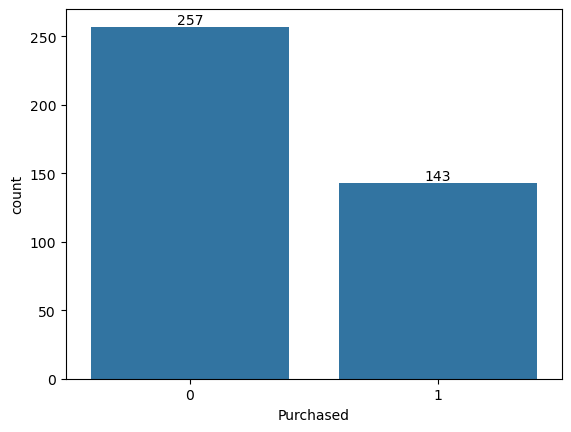

In [66]:
countplot=sns.countplot(x='Purchased',data=df)
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

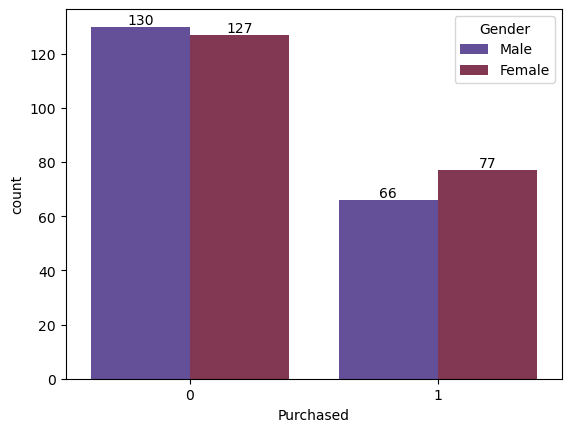

In [67]:
countplot = sns.countplot(x='Purchased', hue='Gender', data=df ,palette='twilight')
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

In [68]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [74]:
print("Test Data:\n", x_test[:10])
print("-"*40)
print("Predicted Labels: ", pred[:10])
print("-"*40)
print("Actual Labels:\n", y_test[:10])

Test Data:
      Age  EstimatedSalary
209   46            22000
280   59            88000
33    28            44000
210   48            96000
93    29            28000
84    30            62000
329   47           107000
94    29            83000
266   40            75000
126   42            65000
----------------------------------------
Predicted Labels:  [0 1 0 1 0 0 1 0 0 0]
----------------------------------------
Actual Labels:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[61  2]
 [10 27]]


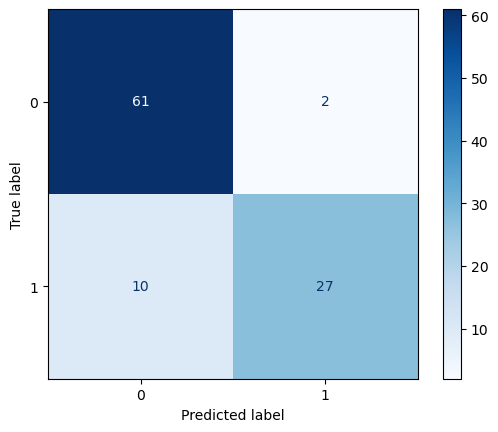

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
display_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display_matrix.plot(cmap=plt.cm.Blues)
plt.show()